# Table of Contents
 * [Project description](#Project-description)
 * [About our data](#About-our-data)
 * [The columns in this dataset are](#The-columns-in-this-dataset-are)
 * [Libraries used in this demonstration](#Libraries-used-in-this-demonstration)
 * [Standar workflow imports](#Standar-workflow-imports)
 * [Importing our dataset using pandas](#Importing-our-dataset-using-pandas)
 * [Splitting our dataset into X (Features) and y (Target values)](#Splitting-our-dataset-into-X-(Features)-and-y-(Target-values))
 * [Splitting our data into train and test set](#Splitting-our-data-into-train-and-test-set)
 * [Converting all values to Numpy array](#Converting-all-values-to-Numpy-array)
 * [Instanciating our model object and adding layers](#Instanciating-our-model-object-and-adding-layers)
 * [Model compilation](#Model-compilation)
 * [Fitting our model with its training data](#Fitting-our-model-with-its-training-data)
 * [Viewing our matrics to determine the efficiency of our model](#Viewing-our-matrics-to-determine-the-efficiency-of-our-model)
 * [Model summary information](#Model-summary-information)
 * [Predicting the outcome of our X_test and comparing with actual values of y](#Predicting-the-outcome-of-our-X_test-and-comparing-with-actual-values-of-y)
 * [Visualizing our model](#Visualizing-our-model)

## Project description

This demonstration is intended for the sole purpose of training, testing and evaluating of the model created for the second MDF project. The project made use of modified data obtained from the popular site known as kaggle. The data set used to train our model was the Iris data set used in R. A Fisher's classic 1936 paper. For the sake of theses experiment, the Iris data set was slightly modified due to time contraints and as a result of much time spent on resolving compatibility issues of a shared dependency known as protobuf. 

## About our data

Originally the data consist of three (3) isris spicies with 50 samples, each as well as some properties abot each flower. One flower species is linerarly seperable from the other two nut the other two are not linearly separable from each other. In this demonstration, the data gotten from kaggle were sorted and arraged according to specie types and in alphabetically. This lower species ranking lowest according to alphabetical sorting were the ones removed. In this demonstration,the species name Iris-setosa and Iris-vesicolor were assigned value 1 and 2 respectively as target values.

## The columns in this dataset are

 * ID: These are the various index number assigned to each roles. This starts from index zero (0) and terminates at ninty nine (99)
 * Sepal Length in Cm: This is the length of the sepals, which are the green leaf like structures that surrounds and protects the flower when it is in bud.
 * Sepal Width in Cm: This is the width of the sepal whic is measured in perpendicular length.
 * Petal Length Cm: This refers to the length of the petals, which are colorful leaflike structures that make up the outer most parts of of the flower. 
 * Petal WIdth Cm: This is the width of the petal and it is also measured in perpendicular length.
 * Species: The species are our target variables for the model, and are Iris-setosa and Iris-vesicolor. They are assigned numerical values of 0 and 1 respectively 

## Libraries used in this demonstration
 * Numpy: Numpy is a Python library used for numerical computing. This library provides fast and efficient functions for performing mathematical operations for performing mathematical operations on array and matrices. Numpy's main datatype is the ndarray, which is a multidimentional array that allows us perfrm mathematical operations on entire arrays
 * keras.metrics.accuracy: This module contains a special function known as accuracy which is used to measure the accuracy of a classification model during training and evaluation. It computes the accuracy rate as the fraction of correctly classified samples over the total numer of samples.
 * Keras.utils.vis_utils.plot_model: This function is uesd to create visual representations of a keras model. It is useful in enabling us understand how the model is and what is going on.
 * tensorflow.keras.layers.dense:This enables us to create a fully connected neural network layer, it a very common layer used in deep learning models. With the used of dense, we are able to stalk layers on top of each other. 
 * Pandas: In this demonstration, pandas is used for importing our data set, it enable us separate the the target value from the features, it was also used to enable us reconstruct our final Y_Pred againts the actual_Y values.
 * Sklearn.model_selection.train_test_split: In this demonstration, this function was gotten form the scikit-learn library, this function enables us to split our data sets into a training set and a test set. This is an essential step in machine learning as it helps us evaluate the performance of a model on data it has never seen before.
 * Tensorflow.keras.models.sequential: This allows us to build neural network models layer-by-layer in a sequential manner. it is one of the most commonly used classes in keras for building deep learning models.
* Tensorflow.keras.models.save_model: This is also a function from thekeras library in Python, This allows us to save a trained model to a file for later usage. this function can be used to save the keras model along with its architecture, weights and optimizer state. It use a .h5 extension when making saves.

## Standar workflow imports

In [38]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.models import save_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.metrics import Accuracy
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

## Importing our dataset using pandas
The data was imported into jupyter as a dataframe using the `.read_csv()` function, this takes the name of the dataset to be imported as the arguements. After inporting our dataset, to be sure the right dataset was imported and to also identify the various features and target values present we view the dataset using the `.head()`. This method makes visible the first 5 rows of the dataset.   

In [40]:
my_dataset = load_iris()
X = my_dataset.data
y = my_dataset.target
X = X[:100]
y = y[:100]

## Splitting our dataset into X (Features) and y (Target values)
For any machine model training work, as outcome(s), there should always be an expected values, in data science, these values as assigned y. This is the basis with which the model evaluates its data upon and uses this as a means to comfirm its predictions during training of the model. This lets the model know its doing the right thing and serves as feedback for the mode.

## Splitting our data into train and test set
This is a big requirement when it comes to model training, it doesnt just stop at simple splitting the data, it does beyond that it randomises the data in such as way as to enable random destribution especially for this type of data were all the roles are arranged from 0s to 1s and are the species Iris--setosa and Iris-vesicolor respectively. In this case there is a need for randomisation. Note because random states constantly changes we need to set a random state or randomisation seed value so as to lock our randomisation to a set fixed randomisation pattern. 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
X_train.shape, y_train.shape

((80, 4), (80,))

## Converting all values to Numpy array
This is important as it converts our dataframe into an ndarray, this enables the model to better understant the data and form meaning connections between the data being fed into the model.

## Instanciating our model object and adding layers
This enables us to specify the dimention our data will be taking as input, it also specifies the number of neurons to use for each layer, aside from that it also specifies the activations as well as the layer_names. naming of individual layer with specific and easy use and remember names would come in extremely useful in the next phase of our demonstration. Finally, the use it also helps set the output value for our predictons.

In [45]:
model = Sequential()
model.add(Dense(units= 32, activation= "relu", input_dim= 4, name = "first_layer"))
model.add(Dense(units= 64, activation= "relu", name = "second_layer"))
model.add(Dense(units= 64, activation= "relu", name = "third_layer"))
model.add(Dense(units= 1, activation= "sigmoid", name= "fourth_layer"))

## Model compilation
This helps to check fo rformat errors and defines the loss function, the optimizer or learning rate and the matrics used.

In [46]:
model.compile(loss="mse",
             optimizer= "adam",
             metrics=["accuracy"])

## Fitting our model with its training data
This enables us to fit our model based on the data we have. After fitting our model, it enables us to make prediction based similar on similar data. Fitting our model means means passing training data through our model so as to to update the model and its internal mathematical variables, thereby getting it ready to make predictions. While fitting our model we can pass various parametes such as batch_sizes, epochs, verbose, validation_data etc.

In [47]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (X_test, y_test), verbose = False)

## Viewing our matrics to determine the efficiency of our model
Runnning this simple loop enables us to know our models loss rates as well as its overall accuracy. This is important as it enable us know if our model underfits or overfits our data, in this case, the dataset are not so complicated and our model can quickly fine relationships betweeen the data, enabling it to get perfect accuracy scores.

In [48]:
scores= model.evaluate(X_train, y_train, verbose=0)
for i in range(2):
    print("{}: {:.2f}".format(model.metrics_names[i], scores[i]))

loss: 0.06
accuracy: 1.00


## Model summary information
This provides a way to summarize a model, The summary includes the following sets of informations such as:
 * The layers and their order in the model
 * The output shapes of each layer
 * The number of parameters (weights and biases in each layers)
 * The total number of parameters (weights and biases in the mdel)

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 32)                160       
                                                                 
 second_layer (Dense)        (None, 64)                2112      
                                                                 
 third_layer (Dense)         (None, 64)                4160      
                                                                 
 fourth_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 6,497
Trainable params: 6,497
Non-trainable params: 0
_________________________________________________________________


## Predicting the outcome of our X_test and comparing with actual values of y
This done with the fuction `.predict()`. This takes the X_test dataset as argument in predicting the values of .

In [50]:
y_pred = model.predict(X_test)

In [51]:
my_df = pd.DataFrame(y_test).reset_index()
my_df = my_df.drop(["index"], axis=1)
my_df.columns = ["Actual Target"]
my_df["Predicted Target"] = y_pred.round().astype(int)
my_df

,Actual Target,Predicted Target
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


## Visualizing our model
The summary i suseful for simple models but it can be confusing for models that have multiple imputs or outputs. This enables us to quickly understand what is happen at a glance of the model.

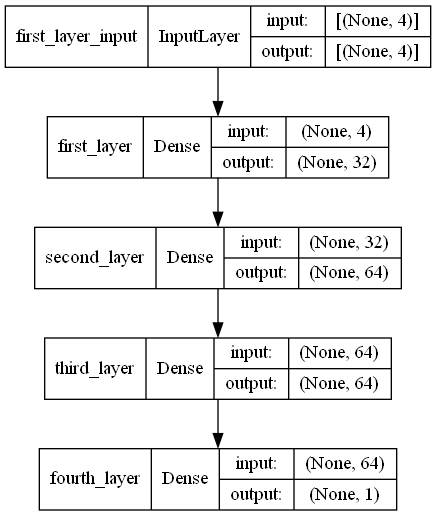

In [52]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

## Saving our model for later use
This involves saving our trained model by calling the save function and assigning a suitable name for the model to be saved.

In [53]:
save_model(model, 'model.h5')